In [336]:
import numpy as np
import importlib
import dataset
import config, plotting, sample, SampleCharacter, XLim, QRselection
import QrModels, Point
import copy
import RelativeImportance
import Measure
import Generation

importlib.reload(config)
importlib.reload(dataset)
importlib.reload(plotting)
importlib.reload(sample)
importlib.reload(SampleCharacter)
importlib.reload(XLim)
importlib.reload(QRselection)
importlib.reload(QrModels)
importlib.reload(Point)
importlib.reload(RelativeImportance)
importlib.reload(Measure)
importlib.reload(Generation)

<module 'Generation' from 'D:\\netSVG\\Generation.py'>

In [337]:
import os
dataset_config = config.DatasetConfig(scenario="functional", n_instance=1000)

assert(dataset_config.scenario == "functional")
fig_dir = f"../figures/{dataset_config.scenario}"

try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")


Directory ../figures/functional already exists replacing files in this notebook


In [338]:
file_name_test = "../data/functional/test_data.txt"
X_test,Y_test = dataset.get_functional_test_data(file_name_test)

In [339]:
file_name_train = "../data/functional/train_data.txt"
X_train,Y_train = dataset.get_functional_train_data(file_name_train)

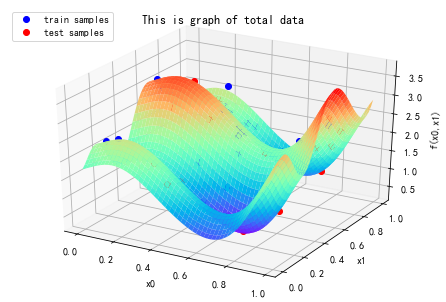

In [340]:
exp_config = config.Config(
    model=config.ModelConfig(activation="elu", lr_gen=0.0001, dec_gen=0, lr_disc=0.001, optim_gen="Adam", 
                             optim_disc="Adam", z_input_size=1),
    training=config.TrainingConfig(n_epochs=2000, batch_size=100, n_samples=100),
    dataset=dataset_config,
    run=config.RunConfig(save_fig=1)
)

plotting.plot_front(X_train, Y_train, X_test, Y_test, exp_config, fig_dir)

In [341]:
coef = sample.get_sta_reg_cov(X_train,Y_train)

Unstandardized regression coefficient: 
[-1.08468  0.09633]
normal coefficient: 
2.44233
Standardized regression coefficient: 
[-0.36156  0.0381 ]
normal coefficient: 
-0.0


In [342]:
imp = RelativeImportance.relativeImp()
imp = list(imp.values())
print("The importance for every dimension:")
print(imp)

100%|██████████| 1/1 [00:00<?, ?it/s]
 D:\CondaEnv\netSVGpython36\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning:Mean of empty slice.


Selecting 2 Best Predictors for the Model
Selected Predictors :  ['x1', 'x2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.13848205363847288

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['x1', 'x2']

Creating models for 3 possible combinations of 2 features :
#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################
#########################  Variable Dominance Calculation Done!!!!!  #########################

The importance for every dimension:
[0.9422900361786678, 0.05770996382133217]


In [343]:
length, max_dist = sample.get_sample_length(X_train,imp)

Euclidean distance in x domain：
minist dist:
0.001
maxist imp:
0.9422900361786678
The original length of the smaple: 
[0.001   0.00006]


In [344]:
x_min = np.amin(X_train, axis=0)
x_max = np.amax(X_train, axis=0)
L = sample.get_x_len(x_min, x_max)

The value area of x in the sample is between 0.0148 and 0.9764in the dimension of No. 0
The value area of x in the sample is between 0.07 and 0.9869in the dimension of No. 1
The full length of every dimension:
[0.9616 0.9169]


In [345]:
n_sample = [11,11]
length = [0.0874, 0.0833]
#n_sample,length = sample.divide_sample(length, L, 130)

In [346]:
dim = len(X_train[0])
gen_x = sample.gen_x_center(dim,length,n_sample, x_min)

第0维度，最小的x为0.0148
第0维度的中心值有：
[0.0585, 0.1459, 0.2333, 0.3207, 0.4081, 0.4955, 0.5829, 0.6703, 0.7577, 0.8451, 0.9325]
第1维度，最小的x为0.07
第1维度的中心值有：
[0.11165, 0.19495, 0.27825, 0.36155, 0.44485, 0.52815, 0.61145, 0.69475, 0.77805, 0.86135, 0.94465]


In [347]:
gen_sample_point = sample.gen_product2(gen_x)
#print("样方中心点：")
gen_sample_point = np.array(gen_sample_point)
#print(gen_sample_point)

In [348]:
xlimit = []
for index in range(len(n_sample)):
    l = []
    for i in range(n_sample[index]):
        x = x_min[index] + i * length[index]
        l.append(x)
    l.append(x_min[index] + n_sample[index] * length[index])
    xlimit.append(l)

In [349]:
sample_list = []
xlim_list = []

In [350]:
x_value = []
for index in range(dim):
    xl = []
    for i in range(len(X_train)):
        x = X_train[i][index]
        r = 0
        for xi in xl:
            if xi == x:
                r = 1
        if r == 0:
            xl.append(x)
    x_value.append(xl)
    
x_value_ori = copy.deepcopy(x_value)

In [351]:
XLim.con_s(gen_sample_point, sample_list, dim, xlimit)

In [352]:
XLim.con_sample(xlim_list, length, x_min, dim, n_sample)

In [353]:
XLim.sample_feature(xlim_list, sample_list, x_value)

In [354]:

XLim.add_xvalue(xlim_list)

In [355]:
x_com, x_add = Generation.get_x_com(X_train, dim, x_value, x_value_ori)

In [356]:
E_dist = Generation.E_dist(x_com)

In [357]:
gen_x = []
discard_list = []
Generation.gen_x_sample(sample_list, X_train, gen_x, max_dist, dim, discard_list, x_com, x_max, x_min, E_dist)
#gen_x_cross = sample.gen_product(x_value)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


In [358]:
#sample.cross_point_del(gen_x_cross, X_train)
#f_list = []
#sample.point_filiter(gen_x_cross, X_train, max_dist, x_value, x_value_ori, dim, f_list)

In [359]:
plot_xlim = copy.deepcopy(xlimit)
for index in range(dim):
    i = len(plot_xlim[index])
    plot_xlim[index][i-1] = x_max[index]
        

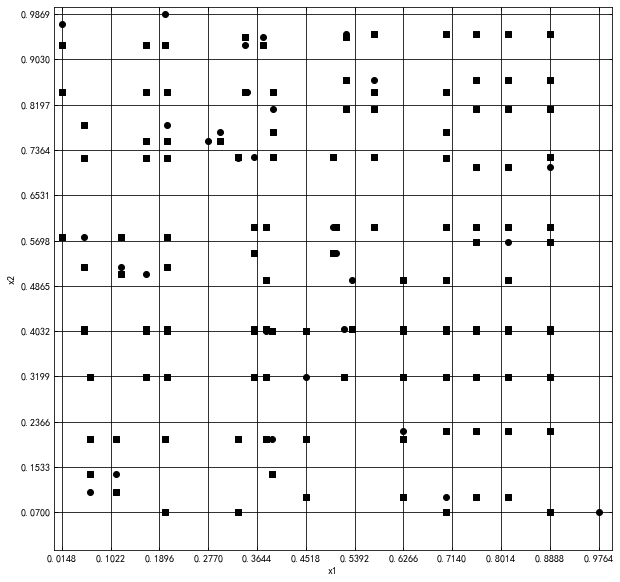

In [360]:
plotting.plot_genx(X_train, np.array(gen_x), length, n_sample, exp_config, fig_dir, plot_xlim, "gen_x.png")

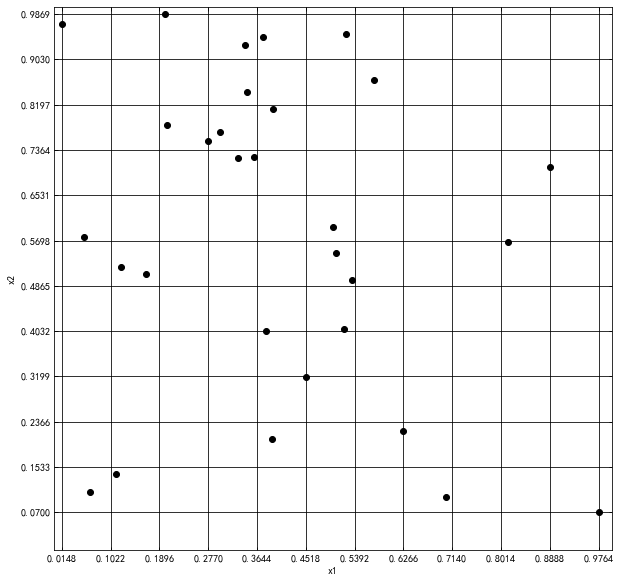

In [361]:
plotting.plot_sample(X_train, exp_config, fig_dir, plot_xlim, "sample.png")

#plotting.plot_genx(X_train, np.array(gen_x_cross), length, n_sample, exp_config, fig_dir, plot_xlim, "gen_cross_x.png")

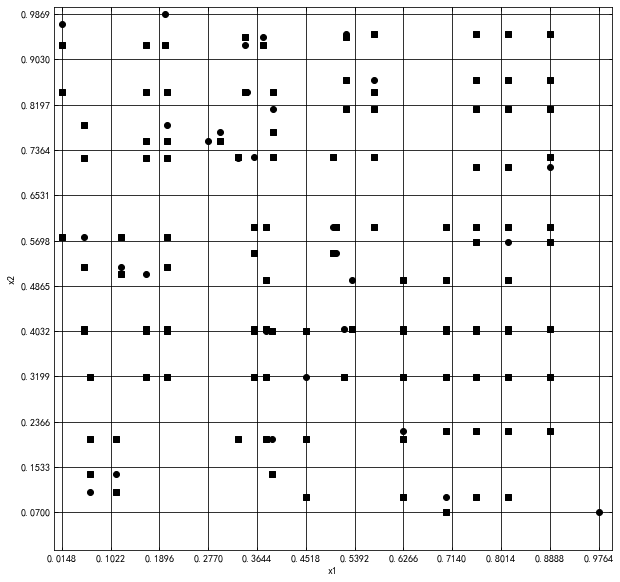

In [362]:
gen_x_checked = []
XLim.check2(sample_list, xlim_list, gen_x_checked, discard_list, gen_x)
XLim.sample_attri(sample_list, X_train, gen_x_checked, Y_train)
XLim.xl_attri(xlim_list, X_train, gen_x_checked)
gen_x = np.array(gen_x)
plotting.plot_genx(X_train, np.array(gen_x_checked), length, n_sample, exp_config, fig_dir, plot_xlim, "gen_x_checked.png")

#XLim.sample_attri(sample_list, X_train, gen_x_cross, Y_train)
#XLim.check(sample_list, f_list, gen_x_cross, X_train,xlim_list)
#XLim.xl_attri(xlim_list, X_train, gen_x_cross)
#XLim.add_xvalue(xlim_list)
#gen_x_cross = np.array(gen_x_cross)
#plotting.plot_genx(X_train, np.array(gen_x_cross), length, n_sample, exp_config, fig_dir, plot_xlim, "gen_cross_x_checked.png")

In [363]:
import GPy

noise = 0.01
length_ = 0.1

run_hyperopt_search = True

kernel = GPy.kern.RBF(input_dim=2, variance=noise, lengthscale=length_)
gpr = GPy.models.GPRegression(X_train, Y_train.reshape(-1,1), kernel)
if run_hyperopt_search:
    gpr.optimize(messages=True) 

In [364]:
gen_y_cross, cov_train_cross = gpr.predict(np.array(gen_x_checked))

In [365]:
XLim.add_y(sample_list, gpr)
print("over")

over


In [366]:
point_list = []
Point.con_point(gen_x_checked, gen_y_cross, point_list)

In [367]:
for sample in sample_list:
    for index in range(len(sample.gen_xlist)):
        for point in point_list:
            r = -1
            for i in range(dim):
                if point.x[i] != sample.gen_xlist[index][i]:
                    r = 0
                    break
            if r == -1:
                sample.points.append(point)

In [368]:
import statsmodels.api as sm
qrX = X_train
qrX = sm.add_constant(qrX[0:])
qr = sm.QuantReg(Y_train.reshape(-1,1),qrX)
res = qr.fit(q=.2)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2960
Model:                       QuantReg   Bandwidth:                       1.146
Method:                 Least Squares   Sparsity:                        2.326
Date:                Wed, 18 Nov 2020   No. Observations:                   30
Time:                        23:34:03   Df Residuals:                       27
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5650      0.695      3.692      0.001       1.140       3.990
x1            -2.8775      0.796     -3.617      0.001      -4.510      -1.245
x2             0.0942      0.791      0.119      0.906      -1.528       1.717


In [369]:
quantiles = np.arange(.05, .96, .1)
quantiles = np.around(quantiles, decimals=3)
def fit_model(q):
    res = qr.fit(q=q)
    return q, np.around(res.params,decimals=4)

models = []

for x in quantiles:
    q, param = fit_model(x)
    model = QrModels.QrModels(q, param[0], param[1:])
    models.append(model)

for model in models:
    print(str(model.q)+'\t'+str(model.a)+'\t'+str(model.param))

ols = sm.OLS(Y_train.reshape(-1,1),qrX).fit()
           
for ol in ols.params:
    print(str(ol))

 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:235: RuntimeWarning:invalid value encountered in less_equal
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.


0.05	1.5307	[-2.1743  0.736 ]
0.15	2.5677	[-3.2895  0.3183]
0.25	2.547	[-2.864   0.2543]
0.35	2.525	[-2.1032 -0.0023]
0.45	2.5091	[-2.1013  0.1458]
0.55	2.4922	[-0.7705  0.2478]
0.65	2.4692	[-0.5318  0.2228]
0.75	2.7868	[-0.4381 -0.1179]
0.85	3.899	[-1.086  -1.1141]
0.95	3.4968	[-0.731 -0.319]
2.442331164960009
-1.0846771586848056
0.09632890094793461


In [370]:
y_quantile = [0.691, 1.084, 1.592, 1.803, 2.194, 2.365, 2.440, 2.574, 2.670, 3.239]

In [371]:
vir_xpoint = []
vir_ypoint = []

for xv in x_value:
    xv.sort()
for xv in x_value_ori:
    xv.sort()

In [372]:
QRselection.qr_selection(xlim_list, models, vir_xpoint, vir_ypoint, y_quantile, ols, x_value_ori,
                 n_sample, X_train, Y_train, sample_list, point_list, x_value)
print("over")

over


In [373]:
i = 0
for point in point_list:
    if point.checked == 1:
        i += 1
print("over")

over


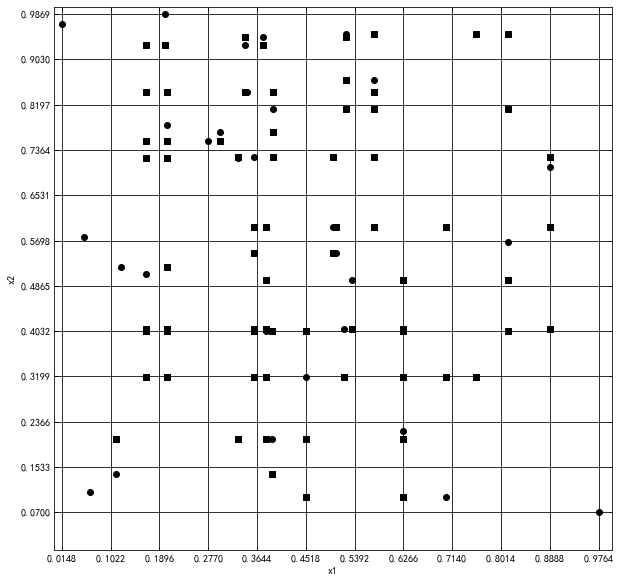

In [374]:
import plotting
import importlib
importlib.reload(plotting)

plotting.plot_genx(X_train, np.array(vir_xpoint), length, n_sample, exp_config, fig_dir, plot_xlim, "vir_point.png")

In [375]:
del_point = []
vir_point = []

for point in point_list:
    point.true = dataset.function(point.x[0], point.x[1])
    point.erro = point.true - point.y
    if point.y not in vir_ypoint:
        del_point.append(point)
    else:
        vir_point.append(point)

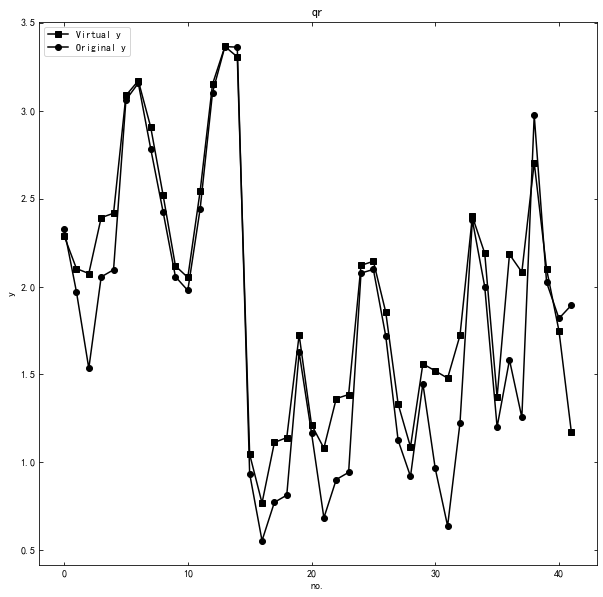

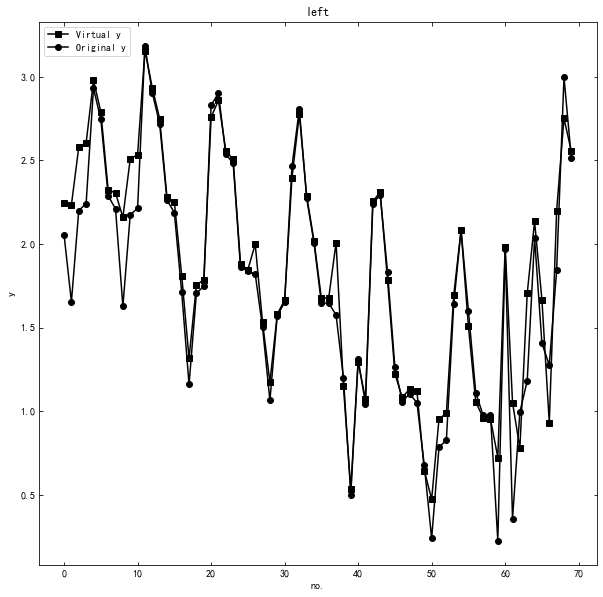

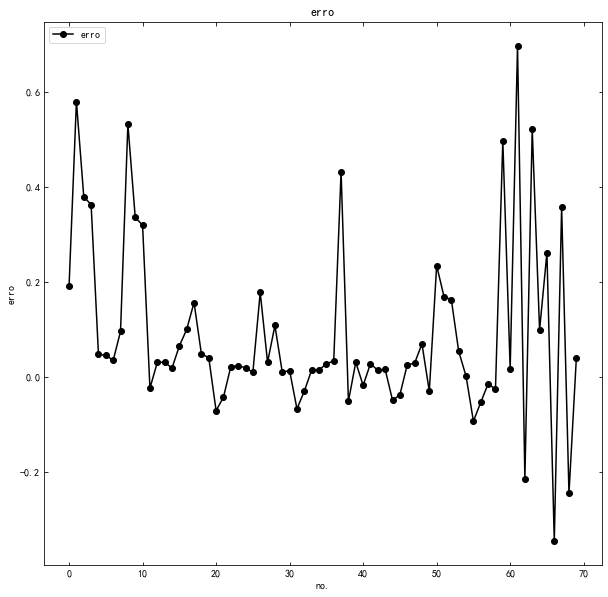

In [376]:
plotting.plot_qr(del_point, exp_config, fig_dir, "qr")
plotting.plot_qr(vir_point, exp_config, fig_dir, "left")
plotting.plot_erro(vir_point, exp_config, fig_dir, "erro")

In [377]:
mae = Measure.mae1(vir_point)
mse = Measure.mse1(vir_point)
mape = Measure.mape1(vir_point)
print(" all vir point")
print(mae)
print(mse)
print(mape)

 all vir point
[0.1295926]
[0.04324253]
[0.14303469]


In [378]:
np.savetxt("../figures/functional/vx_data.txt", np.array(vir_xpoint),fmt='%.8f',delimiter=' ')

In [379]:
np.savetxt("../figures/functional/vy_data.txt", np.array(vir_ypoint),fmt='%.8f',delimiter=' ')